In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Задание 1

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
data = boston.data

In [6]:
target = boston.target

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
y = pd.DataFrame(target, columns=['price'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [15]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [18]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [19]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

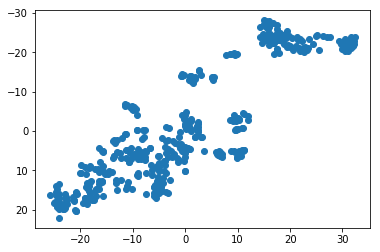

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
# По непонятной причине в jupyter notebook произошла инверсия осей, поэтому применяю эту функцию:
plt.gca().invert_yaxis()
plt.show()

# Задание 2

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [23]:
kmeans.fit(X_train_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [24]:
centers = kmeans.cluster_centers_

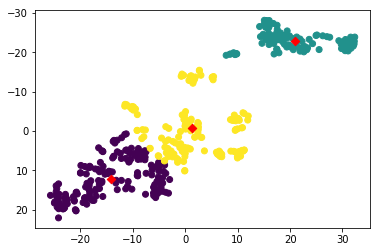

In [25]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=kmeans.labels_)
plt.gca().invert_yaxis()
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

In [26]:
X_train['label'] = kmeans.labels_
X_train['PRICE'] = y_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
X_train.groupby(['label'])['PRICE', 'CRIM'].mean()

,PRICE,CRIM
label,,
0,27.380124,0.114327
1,16.277228,13.080812
2,22.236620,0.764209


# Задание 3

In [36]:
kmeans.fit(X_test_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
X_test['label'] = kmeans.labels_
X_test['PRICE'] = y_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
X_test.groupby(['label'])['PRICE', 'CRIM'].mean()

,PRICE,CRIM
label,,
0,16.371429,10.114193
1,26.726471,0.121186
2,21.518182,0.370895
